<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Euler_sinAndcos_ntheta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>$e^{jn\theta}=\cos(n\theta)+j\sin(n\theta)$</h1></b>

Dr. Bingsen Wang

2/9/2025
</center>

#Python Code

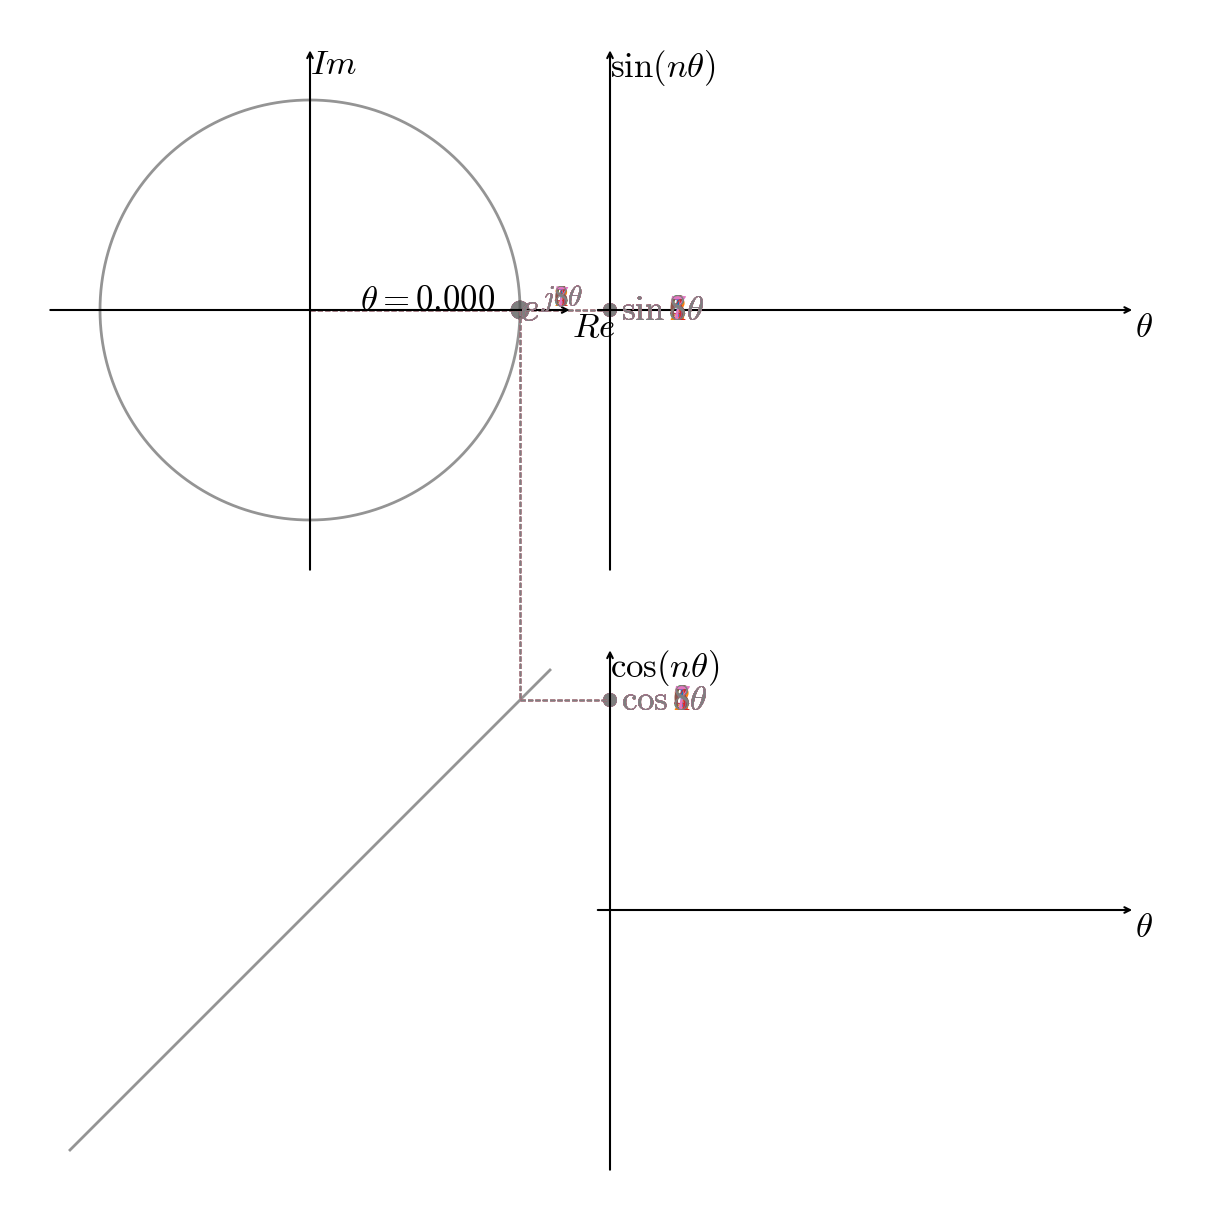

In [4]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nl,Nf,r,x0,y0 = 8,2000,2.8,[0,4,4],[0,0,-8]
n,theta = np.linspace(1,Nl,Nl),np.linspace(0,np.pi*2,Nf)
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([12,12]))
ax = fig.add_axes([0,0,1,1],xlim=[-4,12],ylim=[-12,4])
ax.axis('off')
ax.plot(r*np.cos(theta),r*np.sin(theta),[3.2,-3.2],[y0[2]+3.2,y0[2]-3.2],lw=2,c='0.3',alpha=.6)
[ax.annotate('',[(x0[i]+[3.5,7,7][i],y0[i]),(x0[i],y0[i]+3.5)][k],
              [(x0[i]+[-3.5,-.2,-.2][i],y0[i]),(x0[i],y0[i]-3.5)][k],
             arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(3) for k in range(2)]
[ax.text([x0[i]+[3.5,7,7][i],x0[i]][k],[y0[i],y0[i]+3.5][k],
         ['$Re$',r'$\theta$',r'$\theta$','$Im$',r'$\sin(n\theta)$',r'$\cos(n\theta)$'][i+k*3],
         size=25,va='top') for i in range(3) for k in range(2)]
sc=[ax.scatter(n*0,n*0,marker='o',c=clst[:len(n)],s=[150,80,80][k]) for k in range(3)]
lines=[[ax.plot([],[],ls=['--','--','-','-'][k],lw=[1,1,4-2.5*i/(Nl-1),4-2.5*i/(Nl-1)][k],
                c=clst[i])[0] for i in range(Nl)] for k in range(4)]
lines.append(ax.plot([],[],lw=2,c='k')[0])
txt = [[ax.text(0,0,'',c=clst[i],size=[30,25,25][k],ha=['center','left','left'][k],
                va='center') for i in range(Nl)] for k in range(3)]
txt.append(ax.text(0,0,'',c='k',size=25))
def animate(k):
  ejnt = np.array([r*np.exp(1j*theta[:k+1]*n[i]) for i in range(Nl)])
  ejnt1=ejnt[:,-1]
  [sc[i].set_offsets(np.c_[x0[i]+[ejnt1.real,theta[k]+np.zeros(Nl),theta[k]+np.zeros(Nl)][i],
                           y0[i]+[ejnt1.imag,ejnt1.imag,ejnt1.real][i]]) for i in range(3)]
  [lines[0][i].set_data([0,ejnt1[i].real,theta[k]+x0[1]], [0,ejnt1[i].imag,ejnt1[i].imag]) for i in range(Nl)]
  [lines[1][i].set_data([ejnt1[i].real,ejnt1[i].real,theta[k]+x0[2]],
   [ejnt1[i].imag,y0[2]+ejnt1[i].real,y0[2]+ejnt1[i].real]) for i in range(Nl)]
  [lines[2+m][i].set_data(x0[1+m]+theta[:k+1],y0[1+m]+[ejnt.imag[i],ejnt.real[i]][m])
     for i in range(Nl) for m in range(2)]
  lines[4].set_data(.25*ejnt[0].real,.25*ejnt[0].imag)
  [txt[m][i].set_text([rf'$e^{{j',rf' $\sin{{',rf' $\cos{{'][m]+rf'{n[i]:.0f}\theta}}$')
     for i in range(Nl) for m in range(3)]
  [txt[m][i].set_position((x0[m]+[1.15*ejnt[i,-1].real,theta[k],theta[k]][m],
   y0[m]+[1.15*ejnt[i,-1].imag,ejnt[i,-1].imag,ejnt[i,-1].real][m])) for i in range(Nl) for m in range(3)]
  txt[3].set_position((.4*(ejnt1[0]**.5).real,.4*(ejnt1[0]**.5).imag))
  txt[3].set_text(fr'$\theta={theta[k]:.3f}$')
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Euler_sincos_ntheta.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)